In [1]:
# 导入库和数据
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征
y = iris.target  # 标签

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将标签转换为one-hot编码
y_onehot = np.zeros((y.size, 3))
y_onehot[np.arange(y.size), y] = 1

# 划分训练集和测试集82
X_train, X_test, y_train, y_test, y_train_labels, y_test_labels = train_test_split(
    X_scaled, y_onehot, y, test_size=0.2, random_state=42, stratify=y
)

In [2]:
# 初始化网络参数 
input_size = 4  # 输入层神经元（4个特征）
hidden_size = 6   # 隐藏层神经元
output_size = 3   # 输出层神经元（3个类别）
learning_rate = 0.1 
epochs = 1000 

# 随机初始化权重和偏置
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.1  # 输入层到隐藏层权重
b1 = np.zeros((1, hidden_size))  # 隐藏层偏置
W2 = np.random.randn(hidden_size, output_size) * 0.1 # 隐藏层到输出层权重
b2 = np.zeros((1, output_size)) # 输出层偏置

print(f"权重形状: W1{W1.shape}, W2{W2.shape}")
print(f"偏置形状: b1{b1.shape}, b2{b2.shape}")
print(f"学习率: {learning_rate}, 训练轮数: {epochs}")

权重形状: W1(4, 6), W2(6, 3)
偏置形状: b1(1, 6), b2(1, 3)
学习率: 0.1, 训练轮数: 1000


In [3]:
# 训练神经网络 
loss_history = [] 
train_accuracy_history = [] 
for epoch in range(epochs):
# 前向传播
    # 输入层到隐藏层
    z1 = np.dot(X_train, W1) + b1
    a1 = 1 / (1 + np.exp(-np.clip(z1, -250, 250)))
    
    # 隐藏层到输出层
    z2 = np.dot(a1, W2) + b2
    # softmax激活
    exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
    a2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    # 交叉熵损失
    loss = -np.sum(y_train * np.log(a2 + 1e-8)) / X_train.shape[0]
    loss_history.append(loss)
    
    # 训练准确率
    predictions = np.argmax(a2, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == true_labels)
    train_accuracy_history.append(accuracy)
    
# 反向传播 
    # 输出层误差
    delta2 = a2 - y_train
    # 隐藏层误差
    delta1 = np.dot(delta2, W2.T) * a1 * (1 - a1)  # sigmoid导数
    
    # 梯度 
    dW2 = np.dot(a1.T, delta2) / X_train.shape[0]
    db2 = np.sum(delta2, axis=0, keepdims=True) / X_train.shape[0]
    dW1 = np.dot(X_train.T, delta1) / X_train.shape[0]
    db1 = np.sum(delta1, axis=0, keepdims=True) / X_train.shape[0]
    
    # 更新权重和偏置 
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    # 打印一次进度
    if epoch % 100 == 0:
        print(f"轮次 {epoch}: 损失 = {loss:.4f}, 准确率 = {accuracy:.4f}")

轮次 0: 损失 = 1.0993, 准确率 = 0.3333
轮次 100: 损失 = 0.8532, 准确率 = 0.8750
轮次 200: 损失 = 0.5448, 准确率 = 0.9000
轮次 300: 损失 = 0.4350, 准确率 = 0.9167
轮次 400: 损失 = 0.3677, 准确率 = 0.9250
轮次 500: 损失 = 0.3179, 准确率 = 0.9250
轮次 600: 损失 = 0.2794, 准确率 = 0.9250
轮次 700: 损失 = 0.2482, 准确率 = 0.9333
轮次 800: 损失 = 0.2221, 准确率 = 0.9500
轮次 900: 损失 = 0.1996, 准确率 = 0.9583


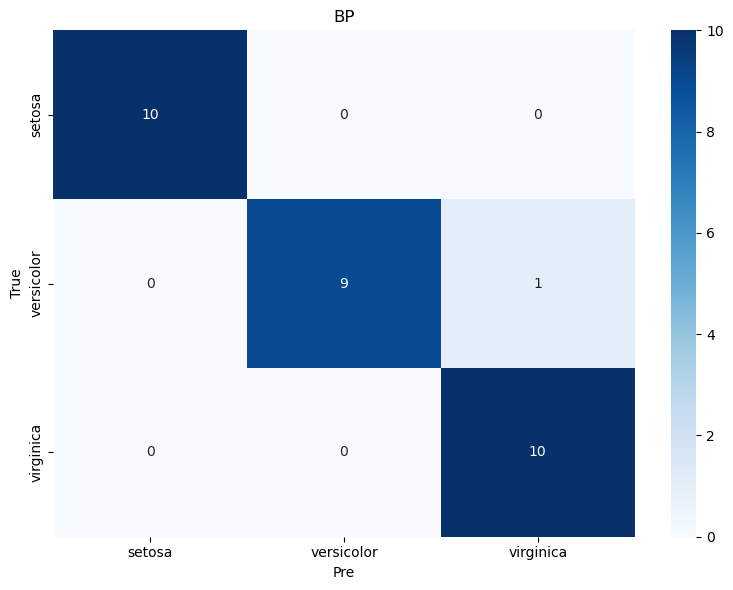

In [6]:
# 预测
z1_test = np.dot(X_test, W1) + b1
a1_test = 1 / (1 + np.exp(-np.clip(z1_test, -250, 250)))
z2_test = np.dot(a1_test, W2) + b2
exp_z_test = np.exp(z2_test - np.max(z2_test, axis=1, keepdims=True))
a2_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)
predictions = np.argmax(a2_test, axis=1)

cm = confusion_matrix(y_test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('BP')
plt.xlabel('Pre')
plt.ylabel('True')
plt.tight_layout()
plt.show()